In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import random
import pickle
import unicodedata
import emoji
from sys import argv
from time import time,sleep
#from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk import RegexpTokenizer

import urlmarker
from html import unescape

sw_ = list(stopwords.words('english'))
p=r'#|@\w*|\d*|<.*?>|('+ urlmarker.ANY_URL_REGEX +')'
ep=u'[\U0001F602-\U0001F64F]'
emoji_pattern = re.compile("["
u"\U0001F600-\U0001F64F"  # emoticons
u"\U0001F300-\U0001F5FF"  # symbols & pictographs
u"\U0001F680-\U0001F6FF"  # transport & map symbols
u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
u"\U00002702-\U000027B0"
u"\U000024C2-\U0001F251"
"]+", flags=re.UNICODE)


def f_all2(arg): #This function is used to perform text cleaning using only language based stopwords (unlike the
                 #cleaning done by filter5 in "Filtering and Cleaning" section). This is done 
                 #because we need context based stopwords for creating wordcloud
    s=''
    if arg['full_text']!='':
        s=arg['full_text']
    else:
        s=arg['text']
    #############################################################################################################    
    #remove emoji
    space=' '
    s_=space.join(char for char in s )#break string into characters seperated by spaces(this is needed to seperate 
    #adjacently joined emojis (other wise they are not recongnised by unicodedata.name() ))

    #print(s_)
    l=emoji_pattern.findall(s_)
    underscore='x'
    #print(l)
    for e in l:#subsitute using emojis identified by emoji_pattern
        try:
            s=re.sub(e,' '+str(underscore.join((unicodedata.name(e).split()))) +' ',s)
            #s=re.sub(e,' ',s)
        except:
            pass

    for char in s : #subsitute using emojis identified by emoji library 
        if char in emoji.UNICODE_EMOJI:
            x=emoji.demojize(char).strip(':').replace('_','x')
            s=re.sub(char,' '+str(x) +' ',s)
            #s=re.sub(char,' ',s)
    
    #############################################################################################################
    #basic cleaning
    space=' '
    s=s.lower() 
    s=unescape((s))    
    s=re.sub(p,'',s)    
    s=space.join(s.split())
    
    #############################################################################################################
    #remove non-alphanumeric
    
    s=re.sub('[^a-zA-Z ]+',' ',s) 
    
    #############################################################################################################
    #remove stopwords
    s_=''
    l=s.split()
    #print(l)
    for e in l:
        if e not in sw_:
            s_=s_+' '+e
    
    return s_

In [5]:
df=pd.read_csv('cleanTweets_pred_prob.csv',na_values={'None','NONE'})

df=df.replace(r'^\s*$', np.nan, regex=True)
df=df.fillna('')

In [6]:
#Before conf restriction
pos=df.loc[df.index[df['pred']=='pos']]
neg=df.loc[df.index[df['pred']=='neg']]
neu=df.loc[df.index[df['pred']=='neu']]


print(len(pos))
print(len(neg))
print(len(neu))

173828
281865
71781


In [ ]:
#cleaning text with diff scheme
df2['pros_text_wordcloud']=df2.apply(f_all2,axis=1)

In [8]:
#after conf restriction
pos=df2.loc[df2.index[df2['pred']=='pos']]
neg=df2.loc[df2.index[df2['pred']=='neg']]
neu=df2.loc[df2.index[df2['pred']=='neu']]


print(len(pos))
print(len(neg))
print(len(neu))

126154
212296
60299


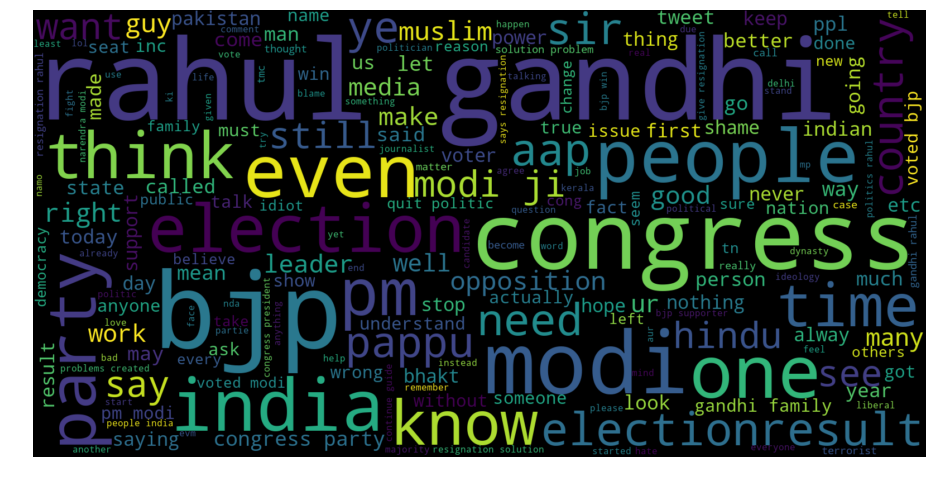

In [23]:
#negative wordcloud
from wordcloud import WordCloud


neg_string = []
for t in neg['pros_text_wordcloud']:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(16,14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

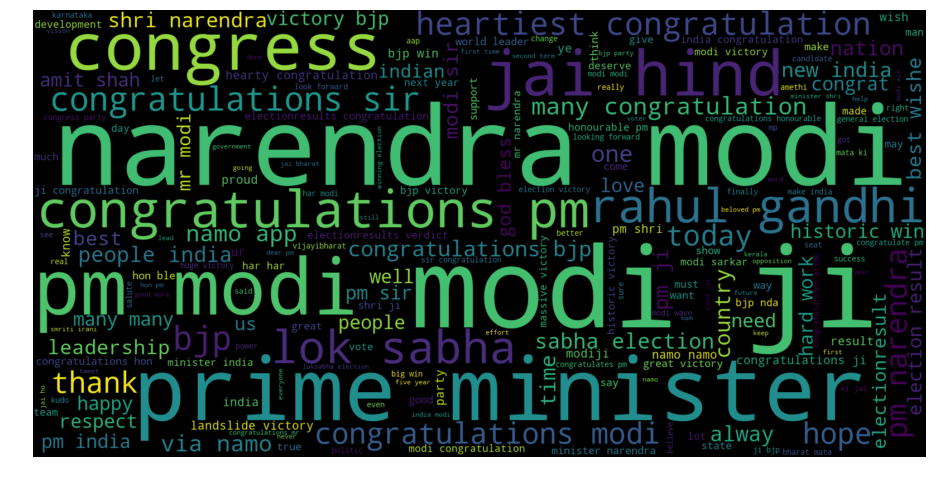

In [24]:
#positive wordcloud
from wordcloud import WordCloud


pos_string = []
for t in pos['pros_text_wordcloud']:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(16,14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

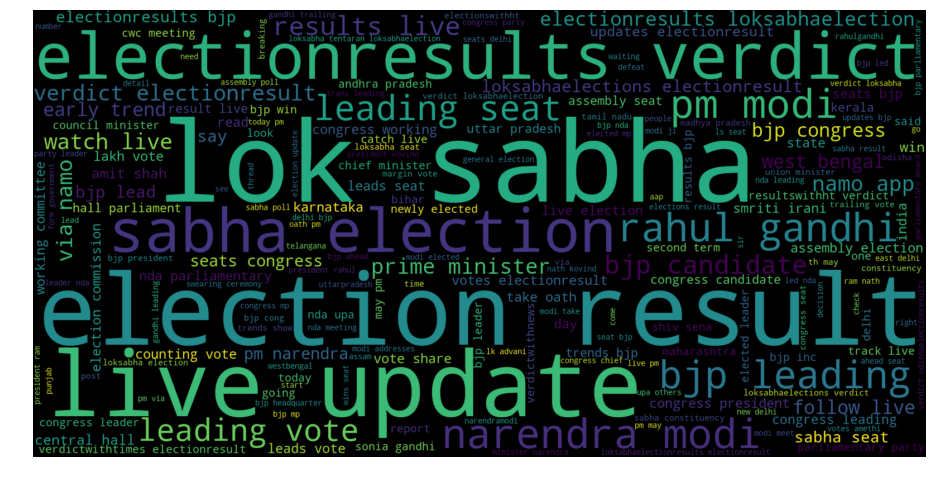

In [25]:
#neutral wordcloud
from wordcloud import WordCloud


neu_string = []
for t in neu['pros_text_wordcloud']:
    neu_string.append(t)
neu_string = pd.Series(neu_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neu_string)
plt.figure(figsize=(16,14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()